In [3]:
pip install praw

     |████████████████████████████████| 189 kB 974 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 249 kB 925 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import praw
import pandas as pd
import datetime as dt

In [2]:

# create a Reddit API instance. 
reddit = praw.Reddit(
    client_id='myclient_id',
    client_secret='mycleint_secret',
    username='my_username',
    password='my_password',
    user_agent='my_user_agent'
)

# define subreddits and keywords to search for
subreddits = ['AskReddit', 'worldnews', 'news','RantsFromRetail','jobs','antiwork','finance','Advice','personalfinance']
keywords = ['recession', 'jobloss', 'migration', 'layoff', 'mental health', 'depressed', 'depressing', 
            'layoffs', 'unemployments','unemployed', 'unemployment', 'fired', 'anxious', 'anxiety', 
            'financial crisis','money problems','pennyless','no career','livelihood', 'moving for job',
            'moved for job','moving','move for job', 'laid off']

mandatory_keywords=['recession','layoff','unemployed','jobloss','layoffs', 'unemployment','lost job','career loss',
                   'laid off','moving','move']
# define time range for posts (in days)
days = 600

# get timestamp for the start of the time range
start_time = int((dt.datetime.utcnow() - dt.timedelta(days=days)).timestamp())

# initialize a list to store the submissions
submissions = []

# loop through the subreddits and fetch submissions that match the keywords
for subreddit in subreddits:
    #pattern = re.compile(f'({"|".join(mandatory_keywords)})\s*({"|".join(keywords)})', re.IGNORECASE)
    #for submission in reddit.subreddit(subreddit).search(pattern, limit=None):
    for submission in reddit.subreddit(subreddit).search('('+' OR '.join(mandatory_keywords) + ')'+' AND '+ '('+' OR '.join(keywords) + ')', limit=None):
        # check if submission is within the time range
        if submission.created_utc >= start_time:
            submissions.append(submission)

# print the number of submissions fetched
print(f"Fetched {len(submissions)} submissions")

# extract relevant information
data = {
    "title": [submission.title for submission in submissions],
    'selftext': [submission.selftext for submission in submissions],
    "score": [submission.score for submission in submissions],
    "subreddit": [submission.subreddit.display_name for submission in submissions],
    "url": [submission.url for submission in submissions],
    "created_utc": [submission.created_utc for submission in submissions]
}

df = pd.DataFrame(data)

# convert created_utc to datetime and set as index
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')


df.to_excel("submissions.xlsx")


Fetched 586 submissions


In [3]:
import numpy as np
import re #RegEx : Regular expression

Create a dataframe

In [4]:
reddit_df = pd.DataFrame(data)
print(reddit_df.head(10))
print(reddit_df.tail(10))

                                               title selftext  score  \
0  What worked out for you in finding a sales job...               2   
1  For all the companies announcing massive layof...               3   
2  Those of you have not gone back to work since ...               4   
3  [Serious] If you moved across the country for ...               1   
4  You’ve been lying in bed for 2 hours unable to...               2   
5  For those who have been laid off from the tech...               1   
6  How are deaths of people taken into considerat...               3   
7  What is the stupidest excuse for being laid-of...               1   
8  People of reddit, what is the right move wait ...               4   
9  ‘A magnet for rip-off artists’: Fraud siphoned...              92   

   subreddit                                                url   created_utc  
0  AskReddit  https://www.reddit.com/r/AskReddit/comments/11...  1.678971e+09  
1  AskReddit  https://www.reddit.com/r/AskReddi

In [5]:
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'], unit='s')
reddit_df.tail(10)

,title,selftext,score,subreddit,url,created_utc
576,"Preparing for the worst; laid off, cash out 401k?",Tl;dr High probability of lay off. Do I take ...,954,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2022-09-08 11:00:42
577,Mom moved out and dad has no job.,"It's hard to talk about, but I do my best.\n\n...",20,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2021-08-18 12:30:07
578,How to access funds after layoff,One thing I never understood with all the reti...,3,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2023-01-08 20:35:55
579,Laid off - Rebalance my debts/assets?,"Hi Reddit,\n\nJust got laid off. Looking to g...",1,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2022-08-05 10:26:16
580,"Layoff, Health Insurance, and Stipend",New user to the sub. I'm in Michigan if it hel...,1,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2021-09-06 19:35:18
581,"Keep lower paying job at safe public sector, o...",I'm in my late 30's and have spent my adult li...,0,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2023-01-24 15:43:35
582,Don’t want to inherit parents money problems. ...,"Sorry this is so long, needed some serious adv...",3,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2022-03-21 14:16:05
583,63 year-old unemployed parent with little savi...,Here's the situation: I know a 63-year old sin...,55,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2023-02-12 03:26:42
584,What Can I Do Next? (Refinanced student loans ...,I feel somewhat defeated by events over the la...,1,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2022-11-23 23:10:07
585,Pre-Layoff decision help,Just got the news of a layoff with a notice pe...,1022,personalfinance,https://www.reddit.com/r/personalfinance/comme...,2023-01-10 12:10:54


In [6]:
selftext_df = reddit_df.loc[:,['selftext']]


In [7]:
selftext_df.head(10)

,selftext
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,


Some posts do not have body.

In [9]:
selftext_df.tail(10)

,selftext
576,Tl;dr High probability of lay off. Do I take ...
577,"It's hard to talk about, but I do my best.\n\n..."
578,One thing I never understood with all the reti...
579,"Hi Reddit,\n\nJust got laid off. Looking to g..."
580,New user to the sub. I'm in Michigan if it hel...
581,I'm in my late 30's and have spent my adult li...
582,"Sorry this is so long, needed some serious adv..."
583,Here's the situation: I know a 63-year old sin...
584,I feel somewhat defeated by events over the la...
585,Just got the news of a layoff with a notice pe...


# Data Cleaning and Transformation

Handling null values

In [10]:
count = (selftext_df['selftext'] == "").sum()
print(count)

135


removing null values

In [11]:
empty_index = selftext_df.index[selftext_df['selftext'] == ''].tolist()
selftext_df = selftext_df.drop(index=empty_index)

In [12]:
count = (selftext_df['selftext'] == "").sum()
print(count)

0


Checking and handling duplicates

In [13]:
selftext_df.duplicated().sum()

1

In [14]:
selftext_df = selftext_df.drop_duplicates()

In [15]:
selftext_df.duplicated().sum()

0

In [16]:
selftext_df.head(10)

,selftext
14,https://www.ghstandard.com/world-bank-approves...
15,"Hi, I'm Ari Shapiro. Over more than 20 years a..."
58,"I’m Georgi Kantchev, a WSJ reporter based in B..."
65,Russia’s state-controlled Gazprom PJSC suspend...
126,"Hi,\n\nI'm sure that there have been countless..."
127,"Apologies if this is super long, this is 2yrs ..."
128,I have worked at a couple other stores in the ...
129,"ok so normally i would not do this ever, but i..."
130,I meant to post this after working on Easter (...
131,This isn't so much a negative rant. It is more...


# Get Subjectivity and Polarity of submission body

Import Necessary Libraries

In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

Get Polarity and Subjectivity

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
selftext_df['Subjectivity'] = selftext_df['selftext'].apply(getSubjectivity)
selftext_df['Polarity'] = selftext_df['selftext'].apply(getPolarity)
#Now display data
selftext_df.head(10)

,selftext,Subjectivity,Polarity
14,https://www.ghstandard.com/world-bank-approves...,0.000000,0.000000
15,"Hi, I'm Ari Shapiro. Over more than 20 years a...",0.290741,0.183333
58,"I’m Georgi Kantchev, a WSJ reporter based in B...",0.284839,0.102756
65,Russia’s state-controlled Gazprom PJSC suspend...,0.295588,0.020588
126,"Hi,\n\nI'm sure that there have been countless...",0.432854,0.020484
127,"Apologies if this is super long, this is 2yrs ...",0.464589,0.000754
128,I have worked at a couple other stores in the ...,0.478177,0.035574
129,"ok so normally i would not do this ever, but i...",0.402864,-0.049903
130,I meant to post this after working on Easter (...,0.469167,-0.028611
131,This isn't so much a negative rant. It is more...,0.514250,0.070669


Group Polarity

In [19]:
def getInsight(polarity, subjectivity):
    
    if polarity == 0 and subjectivity == 0:
        return "Not affected"  
    elif polarity < 0.1 and subjectivity > 0.5:
        return "Strongly affected"
    elif polarity < 0.1 and subjectivity <= 0.5:
        return "Affected"
    else:
        return "Not that affected"


In [20]:
selftext_df["Insight"] = selftext_df.apply(lambda x: getInsight(x["Polarity"], x["Subjectivity"]), axis=1)
print(selftext_df.head(10))
selftext_df.to_excel('Insights.xlsx')

                                              selftext  Subjectivity  \
14   https://www.ghstandard.com/world-bank-approves...      0.000000   
15   Hi, I'm Ari Shapiro. Over more than 20 years a...      0.290741   
58   I’m Georgi Kantchev, a WSJ reporter based in B...      0.284839   
65   Russia’s state-controlled Gazprom PJSC suspend...      0.295588   
126  Hi,\n\nI'm sure that there have been countless...      0.432854   
127  Apologies if this is super long, this is 2yrs ...      0.464589   
128  I have worked at a couple other stores in the ...      0.478177   
129  ok so normally i would not do this ever, but i...      0.402864   
130  I meant to post this after working on Easter (...      0.469167   
131  This isn't so much a negative rant. It is more...      0.514250   

     Polarity            Insight  
14   0.000000       Not affected  
15   0.183333  Not that affected  
58   0.102756  Not that affected  
65   0.020588           Affected  
126  0.020484           Affected

# Data Visualization

Checking for the number of posts containing the word - "depression"

In [21]:
depression_count = len(selftext_df[selftext_df['selftext'].str.contains('depression', case=False)
                                   | selftext_df['selftext'].str.contains('depressed', case=False)
                                   | selftext_df['selftext'].str.contains('stress', case=False)
                                   | selftext_df['selftext'].str.contains('anxiety', case=False)
                                   | selftext_df['selftext'].str.contains('mental peace', case=False)
                                  ])
print("Number of submissions showing impacts on mental health':", depression_count)


Number of submissions showing impacts on mental health': 126


In [22]:
migration_count = len(selftext_df[selftext_df['selftext'].str.contains('moving', case=False)
                                   | selftext_df['selftext'].str.contains('moving for job', case=False)
                                   | selftext_df['selftext'].str.contains('moved for job', case=False)
                                   | selftext_df['selftext'].str.contains('shifting for job', case=False)
                                   | selftext_df['selftext'].str.contains('migrate for job', case=False)
                                 ])
print("Number of submissions showing recession's contribution towards migration:", migration_count)


Number of submissions showing recession's contribution towards migration: 82


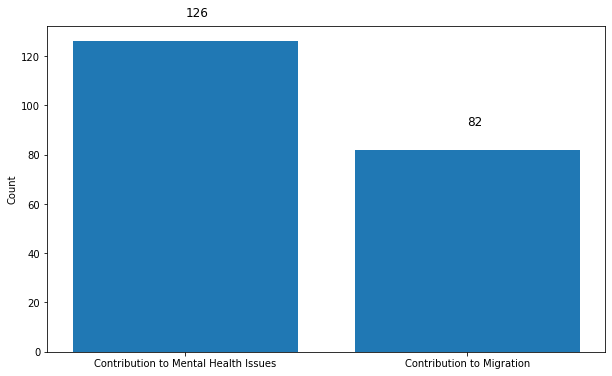

In [23]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10,6))
axis.bar(['Contribution to Mental Health Issues', 'Contribution to Migration'], [depression_count, migration_count], color='#2078B4')

axis.set_ylabel('Count')

# Add the count values to the chart
for i, v in enumerate([depression_count, migration_count]):
    axis.text(i, v + 10, str(v), ha='left', fontsize=12)

# Show the chart
plt.show()

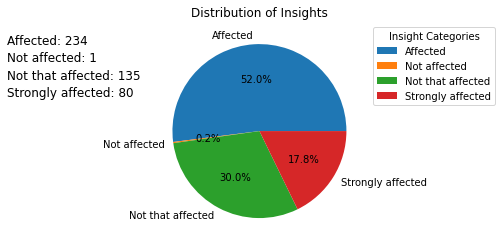

In [32]:
import matplotlib.pyplot as plt

# Group the data by the Insight column and count the number of occurrences of each category
insight_counts = selftext_df.groupby('Insight')['Insight'].count()

# Create a pie chart from the Insight counts
plt.pie(insight_counts, labels=insight_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Insights')

# Add a legend to the chart
plt.legend(title='Insight Categories', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add the number of submissions for each insight category to the chart
y_pos = 1.0
for i, category in enumerate(insight_counts.index):
    count = insight_counts[i]
    plt.text(-2.9, y_pos, category + ': ' + str(count), fontsize=12)
    y_pos -= 0.2

plt.show()


In [33]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Plotting the Sentiment Score of Polarity

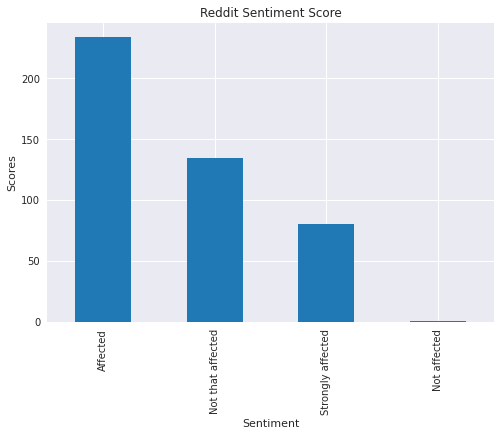

In [34]:
plt.title("Reddit Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
selftext_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

Below word cloud shows the intensity of a word being spoken.

In [35]:
stopwords = STOPWORDS
print(stopwords)

{'http', 'more', "shan't", "we'd", 'com', "didn't", 'doing', "weren't", 'for', 'into', "isn't", 'before', 'hers', "they're", 'same', 'is', 'also', 'very', 'ever', "wasn't", "haven't", 'why', "i'd", 'not', 'which', "she's", 'and', 'their', 'can', 'by', 'be', "shouldn't", 'there', 'from', "aren't", 'have', 'who', 'after', "he'd", 'like', "hasn't", "couldn't", 'any', 'over', 'r', 'above', 'theirs', "you've", 'being', 'me', 'with', 'what', 'should', 'such', "why's", 'ours', 'at', "she'd", 'was', 'get', 'she', "mustn't", 'else', 'therefore', 'hence', 'out', "doesn't", "i'll", 'shall', 'during', 'only', 'has', 'that', 'no', 'on', 'his', 'her', 'k', 'each', 'are', 'about', 'because', 'him', 'again', 'but', 'when', 'all', 'otherwise', 'herself', "they've", 'a', 'our', 'below', 'few', "hadn't", 'to', 'how', "you'd", 'in', "he's", 'my', "that's", 'having', 'so', 'himself', 'he', 'off', 'other', 'ourselves', 'while', "who's", 'does', "it's", 'as', 'between', 'we', 'both', "don't", 'of', 'it', "ca

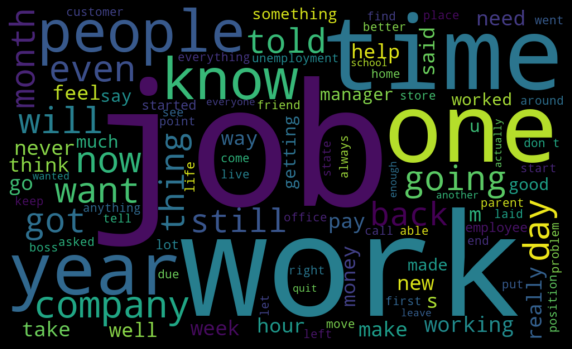

In [36]:
text = ' '.join( [twts for twts in selftext_df['selftext']] ) #To join all tweet
 # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600, 
 max_words = 100,
 stopwords = stopwords,
 background_color='black').generate(text)
# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');